In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [2]:
train = pd.read_csv('C:/Users/amina/OneDrive/Desktop/New folder/train-data.csv').drop('Unnamed: 0', axis=1)
test = pd.read_csv('C:/Users/amina/OneDrive/Desktop/New folder/test-data.csv').drop('Unnamed: 0', axis=1)

In [3]:
data = pd.concat([train, test])

In [4]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data['Name'] = [name.split(' ')[0] for name in data['Name'].values]

In [6]:
data.isna().sum()/len(data)

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000276
Engine               0.006342
Power                0.006342
Seats                0.007307
New_Price            0.861299
Price                0.170136
dtype: float64

In [7]:
data = data.drop('New_Price', axis=1)

In [8]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [9]:
data['Mileage'] = [float(str(i).split()[0]) for i in data['Mileage'].values]

In [10]:
data['Engine'] = [float(str(i).split()[0]) for i in data['Engine'].values]

In [11]:
d = []
for i in data['Power'].values:
    try:
        d.append(float(str(i).split()[0]))
    except:
        d.append(None)

In [12]:
data['Power'] = d

In [13]:
data['Power'].isna().sum()/len(data)

0.02412794705639046

In [14]:
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mean())
data['Engine'] = data['Engine'].fillna(data['Engine'].mean())
data['Power'] = data['Power'].fillna(data['Power'].mean())
data['Seats'] = data['Seats'].fillna(data['Seats'].median())

In [15]:
data.isna().sum()/len(data)

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000000
Engine               0.000000
Power                0.000000
Seats                0.000000
Price                0.170136
dtype: float64

In [16]:
data = data.dropna()

In [17]:
data = pd.get_dummies(data)

In [18]:
data['Price']

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [19]:
X = data.drop('Price',axis=1)
y = data['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
lasso_model = LassoCV()

In [24]:
lasso_model.fit(X=X_train, y=y_train)

LassoCV()

In [25]:
lasso_model.coef_

array([ 3.04975132,  0.01712081, -0.        ,  1.2558547 ,  5.0461569 ,
        0.        ,  0.        ,  1.29466698,  1.10217614,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.29203036, -0.        , -0.        , -0.        ,  0.83980287,
        0.        ,  0.73931112,  1.91165734, -0.35817809,  0.19471449,
        1.78491606,  0.66359829,  0.        , -0.        ,  0.65695263,
       -0.        , -0.10472304,  0.        , -0.00726117,  0.00810625,
       -0.02227768,  0.        , -0.        ,  0.19529544,  0.04426733,
        0.34064881, -0.08088354,  0.24433436,  0.        , -0.        ,
       -0.22604765, -0.09861006, -0.        , -0.        ,  0.        ,
        0.05414443,  0.        , -0.21030696,  0.19849937, -0.        ,
        0.        ,  0.        , -0.07620002,  0.        ])

In [26]:
X

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Ambassador,Name_Audi,Name_BMW,Name_Bentley,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [27]:
from matplotlib import pyplot as plt

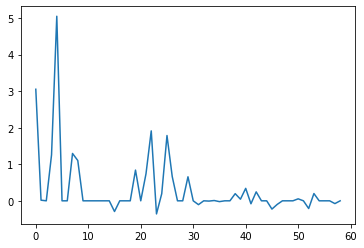

In [28]:
plt.plot(lasso_model.coef_)

In [29]:
from sklearn.metrics import mean_squared_error, make_scorer

In [30]:
y_pred = lasso_model.predict(X_test)

In [31]:
mean_squared_error(y_test,y_pred)

24.972644088102594

In [32]:
data['Price'].mean()

9.479468350224273

In [33]:
rf_model = RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [34]:
mse = make_scorer(mean_squared_error)

In [35]:
params = {
    'max_depth':[3, 5, 7, 9],
    'min_samples_split':[2, 4, 6, 8],
    'min_samples_leaf':[1]
}

In [36]:
rf_cv = RandomizedSearchCV(rf_model, params, n_iter=5, cv=5, scoring=mse)

In [37]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
                   n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 4, 6, 8]},
                   scoring=make_scorer(mean_squared_error))

In [38]:
y_pred = rf_cv.predict(X_test)

In [39]:
mean_squared_error(y_test,y_pred)

26.904358771044024

In [40]:
gb_model = GradientBoostingRegressor(n_estimators=200)

In [41]:
params = {
    'learning_rate':[0.05, 0.1, 0.15, 0.2],
    'min_samples_split':[2, 4, 6, 8],
    'min_samples_leaf':[1]
}

In [42]:
gb_cv = RandomizedSearchCV(gb_model, params, n_iter=5, cv=5, scoring=mse)

In [43]:
gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=200),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 4, 6, 8]},
                   scoring=make_scorer(mean_squared_error))

In [44]:
y_pred = rf_cv.predict(X_test)

In [45]:
mean_squared_error(y_test,y_pred)

26.904358771044027